# NeuFit Modeling Pipeline

### Notes

#### Assumptions

- This Jupyter notebook runs best in Kernel: **neufit**

#### Neufit Modifyed Args Input/Output Details 

- Made changes in variables from args to names below so could be run / modifyed in Jupyer 
- If not trying to do custom plotting with colored - will be easier to use command line for this
- This also assumes that whatever dataset you chose already has the csv files created so had been run through *NeufitPipeline.ipynb*

- Old args input form neufit.py file - Example with combined dataset
```python 
args.data_file.name =/.../NeutralModels/Input_csv/combined_data.csv
args.data_file <open file '/.../NeutralModels/Input_csv/combined_data.csv', mode 'r' at 0x120b28c00>
args.ignore_level 0
args.rarefaction_level 0
args.taxonomy_file <open file '/.../NeutralModels/Input_csv/combined_taxonomy.csv', mode 'r' at 0x120b28c90>
```


- Modifyed varible names - Example with combined dataset
```python 
data_file_name = '/.../NeutralModels/Input_csv/combined_data.csv'
data_file = open(data_file_name, "r")
arg_ignore_level = 0
arg_rarefaction_level = 0
tax_file_name = '/.../NeutralModels/Input_csv/combined_taxonomy.csv'
tax_file = open(tax_file_name, "r")
```

## Choose Dataset + Run Pipeline

### Hutch Kraken Dataset: Ludmil Alexandrov

##### Dataset Info

**Background on Data**
- This data was orginally in the form of Kraken data that we recived from a rotation student in Ludmill Alexandrov's lab 
    - We didn't have access to the fastq files, only the Kraken data due to a limited number of keys
- This data is originally from Fread Hutch and consistets of progressor and non-progressor patients in reference to EAC

**Information on How to Run Data**
- This dataset comes with biome files with the taxonomic data already imported into the files
    - This allows us to simply run **biom2data_tax** which is all set in the neufit Function
- This pipeline assumes everything from Kraken (including this dataset) is already in the **biome** format    
    - In the future we will not be using Kraken but will have the full fastq files 
    - The pipeline used previously to create the kraken-biome files uses: 'pip install krakenplot' which 
        didnt' work on the cluster (1 hour attempt) so wasn't worth implementation
    - More details on how to convert files from Kraken to biom on the command line found on this github: https://github.com/cguccione/BEProgression2EAC/tree/main/PipelineTesting/KrakenBiome_Pipeline

In [1]:
from neuevo.neufit import neufit
from neuevo.utils import biom2data_tax

import matplotlib
%matplotlib inline

##### File Locations

In [2]:
#Datasets: keynameDatatypeCollob
#hutchKraken
hutchKrakenAlex_biom = '/home/cguccion/rawData/01_11_2021_Hutch340_BE_Samples_LudmilAlexandrov/biom' #location of biom files from kraken->biom pipeline

#TCGA_WGS
tcgaEhnWGSgreg_ = '/home/cguccion/rawData/April2021_Greg_TCGA_WGS/raw_from_Greg'#Location of raw data
tcgaEhnWGSgreg_meta = str(tcgaEhnWGSgreg_ + '/' + '13722_20210405-101126-TCGA-WGS-Qiita-sample-metadata.txt')
tcgaEhnWGSgreg_taxa = str(tcgaEhnWGSgreg_ + '/' + 'wol_gotu_taxonomy.csv')

#Intermediate Files
neufit_input_path = '/home/cguccion/NeutralEvolutionModeling/data_tax_csv' #location of _data.csv and _tax.csv files for Neufit input

#Output Files
neufit_output_path = '/home/cguccion/NeutralEvolutionModeling/neufit_output' #location of all graphs and command line outputs from running Neufit


#### Combined Data (Everything in the dataset)

In [3]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True
output_filename = 'combined'
dataset_type = 'hutchKraken'
custom_filename = 'combined_biome'

#Convert data from biom to csv files for Neufit
if dataset_type == 'hutchKraken':
    fnData, fnTaxonomy = biom2data_tax(hutchKrakenAlex_biom, custom_filename, output_filename)
elif dataset_type == 'TCGA_WGS':
    #Determine which biom file for the run
    if output_filename == 'normal':
        biomFilename ='116640_feature-table-TCGA-WGS-STN-ESCA-HNSC.biom'
    elif output_filename == 'cancer':
        biomFilename ='116639_feature-table-TCGA-WGS-PT-ESCA-HNSC.biom'

    #Turn biome file into _data and _tax files
    fnD_hn, fnD_e, fnT_hn, fnT_e = biom_addMetaTax_customTCGAehn(tcgaEhnWGSgreg_, biomFilename, output_filename)

    #Choose the correct _data file, esoph or head and neck
    if custom_filename == 'e':
        fnData = fnD_e
        fnTaxonomy = fnT_e
        output_filename = 'esophagus_' + output_filename
    elif custom_filename == 'hn':
        fnData = fnD_hn
        fnTaxonomy = fnT_hn
        output_filename = 'headNeck_' + output_filename

#Run with all possible output files
neufit(fnData, fnTaxonomy, output_filename, dataset_type, custom_filename,
       norm_graph, colored_graph, non_neutral, full_non_neutral = True)




FileNotFoundError: [Errno 2] No such file or directory: '/home/cguccion/rawData/01_11_2021_Hutch340_BE_Samples_LudmilAlexandrov/biom/combined_biome'

# TODO

#### Progressors Data (Patients who went onto progressor to EAC)

/home/cguccion/.conda/envs/neufit/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


Running dataset: hutchKrakenCategory:progressors

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 4922
    # variables        = 1
    chi-square         = 17.3345341
    reduced chi-square = 0.00352256
    Akaike info crit   = -27801.2436
    Bayesian info crit = -27794.7422
[[Variables]]
    N:  2108 (fixed)
    m:  0.26381399 +/- 0.00751938 (2.85%) (init = 0.5)

 R^2 = 0.77

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
5,0.974981,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6A
2,0.847567,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. J380
3,0.768641,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
1,0.693801,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Comamonadaceae,g__Comamonas,s__thiooxydans
4,0.637458,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
0,0.617201,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__vestibularis


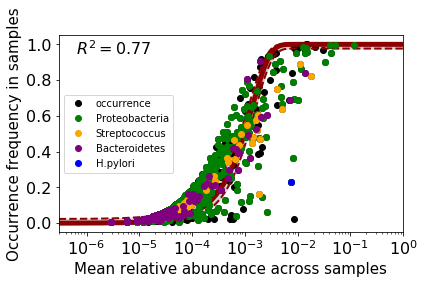

In [13]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True

#Run with all possible output files
neufit('progressors', 'hutchKraken', 'P_biome', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

#### Progressor Data Time Point 1 Only (Patients who went onto progressor to EAC, but were healthy at this timepoint (timepoint 1))

/home/cguccion/.conda/envs/neufit/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


Running dataset: hutchKrakenCategory:progressorsT1

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 3999
    # variables        = 1
    chi-square         = 17.9852171
    reduced chi-square = 0.00449855
    Akaike info crit   = -21609.5936
    Bayesian info crit = -21603.2998
[[Variables]]
    N:  2108 (fixed)
    m:  0.26525056 +/- 0.00869845 (3.28%) (init = 0.5)

 R^2 = 0.75

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
5,0.974458,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6A
6,0.737500,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
4,0.735523,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__oleovorans
2,0.708946,k__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,f__Ruminococcaceae,g__Faecalibacterium,s__prausnitzii
1,0.644570,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,f__Rhodobacteraceae,g__Paracoccus,s__yeei
3,0.606642,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. phDV1
0,0.549255,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Lactobacillaceae,g__Lactobacillus,s__amylovorus


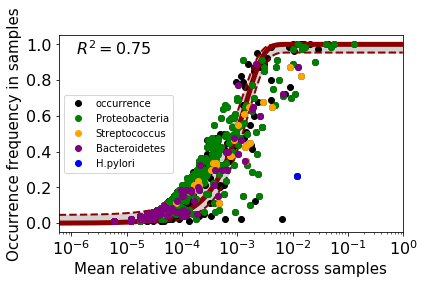

In [14]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True

#Run with all possible output files
neufit('progressorsT1', 'hutchKraken', 'P_T1_biome', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

#### Progressor Data Time Point 2 Only (Patients who went onto progressor to EAC, and had cancer at this timepoint (timepoint 2))

/home/cguccion/.conda/envs/neufit/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


Running dataset: hutchKrakenCategory:progressorsT2

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 3988
    # variables        = 1
    chi-square         = 18.8623427
    reduced chi-square = 0.00473096
    Akaike info crit   = -21349.2640
    Bayesian info crit = -21342.9730
[[Variables]]
    N:  2127 (fixed)
    m:  0.27188636 +/- 0.00902171 (3.32%) (init = 0.5)

 R^2 = 0.75

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
8,0.975000,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6A
7,0.934599,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. J380
6,0.834790,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Comamonadaceae,g__Comamonas,s__thiooxydans
5,0.752509,k__Bacteria,p__Firmicutes,c__Bacilli,o__Lactobacillales,f__Streptococcaceae,g__Streptococcus,s__vestibularis
4,0.732554,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
2,0.630468,k__Bacteria,p__Firmicutes,c__Negativicutes,o__Selenomonadales,f__Selenomonadaceae,g__Selenomonas,s__sputigena
1,0.621452,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pseudomonadales,f__Pseudomonadaceae,g__Pseudomonas,s__sp. MYb193
9,0.575000,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
0,0.554301,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Bifidobacteriales,f__Bifidobacteriaceae,g__Bifidobacterium,s__animalis
3,0.533661,k__Bacteria,p__Firmicutes,c__Negativicutes,o__Selenomonadales,f__Selenomonadaceae,g__Selenomonas,s__sp. oral taxon 478


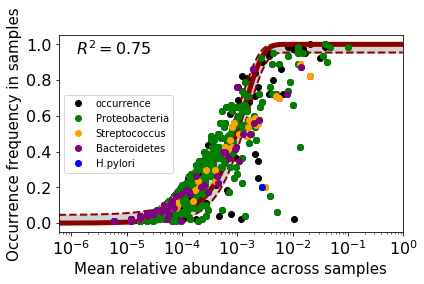

In [15]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True

#Run with all possible output files
neufit('progressorsT2', 'hutchKraken', 'P_T2_biome', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

#### NonProgressor Data  (Patients who went never progressed to EAC

/home/cguccion/.conda/envs/neufit/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


Running dataset: hutchKrakenCategory:nonProgressors

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 4908
    # variables        = 1
    chi-square         = 13.9790894
    reduced chi-square = 0.00284881
    Akaike info crit   = -28764.0786
    Bayesian info crit = -28757.5800
[[Variables]]
    N:  2251 (fixed)
    m:  0.40075898 +/- 0.01125044 (2.81%) (init = 0.5)

 R^2 = 0.84

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,0.955536,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6B
2,0.727777,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
3,0.661111,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
0,0.520290,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Tannerellaceae,g__Tannerella,s__sp. oral taxon HOT-286


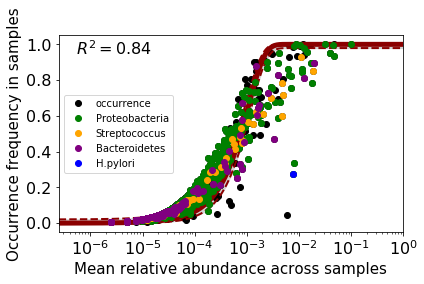

In [16]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True

#Run with all possible output files
neufit('nonProgressors', 'hutchKraken', 'NP_biome', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

#### NonProgressor Data Time Point 1 Only (Patients who did not progress to EAC ever (timepoint 1)

/home/cguccion/.conda/envs/neufit/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


Running dataset: hutchKrakenCategory:nonProgressorsT1

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 20
    # data points      = 3965
    # variables        = 1
    chi-square         = 14.8384935
    reduced chi-square = 0.00374331
    Akaike info crit   = -22154.5644
    Bayesian info crit = -22148.2791
[[Variables]]
    N:  2401 (fixed)
    m:  0.44967032 +/- 0.01498043 (3.33%) (init = 0.5)

 R^2 = 0.83

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
1,0.962500,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6B
2,0.700000,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
0,0.637499,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus


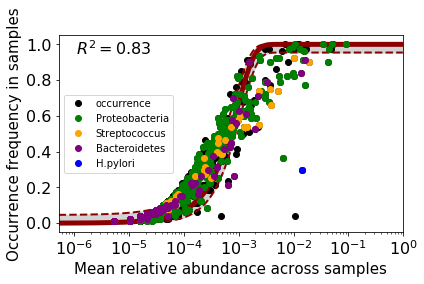

In [17]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True

#Run with all possible output files
neufit('nonProgressorsT1', 'hutchKraken', 'NP_T1_biome', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

#### NonProgressor Data Time Point 2 Only (Patients who did not progress to EAC ever, now at thier second check (timepoint 2)

/home/cguccion/.conda/envs/neufit/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


Running dataset: hutchKrakenCategory:nonProgressorsT2

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 14
    # data points      = 3905
    # variables        = 1
    chi-square         = 15.6939701
    reduced chi-square = 0.00401997
    Akaike info crit   = -21540.8560
    Bayesian info crit = -21534.5860
[[Variables]]
    N:  2251 (fixed)
    m:  0.35687991 +/- 0.01136385 (3.18%) (init = 0.5)

 R^2 = 0.82

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,0.925510,k__Viruses,p__Peploviricota,c__Herviviricetes,o__Herpesvirales,f__Herpesviridae,g__Roseolovirus,s__Human betaherpesvirus 6B
3,0.712500,k__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Pasteurellales,f__Pasteurellaceae,g__Haemophilus,s__parahaemolyticus
1,0.708657,k__Bacteria,p__Proteobacteria,c__Epsilonproteobacteria,o__Campylobacterales,f__Helicobacteraceae,g__Helicobacter,s__pylori
2,0.561282,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Tannerellaceae,g__Tannerella,s__sp. oral taxon HOT-286


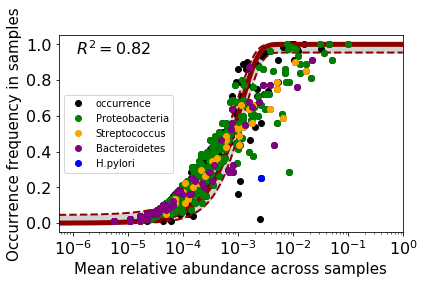

In [18]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True

#Run with all possible output files
neufit('nonProgressorsT2', 'hutchKraken', 'NP_T2_biome', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

### TCGA WGS Esophagus / Head and Neck Cancer Dataset: Greg Poore

##### Dateset Info

#### Esophagus Normal (Paired Tissue Normal)

Running dataset: TCGA_WGSCategory:esophagus_normal

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 1206
    # variables        = 1
    chi-square         = 12.5764359
    reduced chi-square = 0.01043688
    Akaike info crit   = -5501.26682
    Bayesian info crit = -5496.17175
[[Variables]]
    N:  3195 (fixed)
    m:  0.01834339 +/- 9.5467e-04 (5.20%) (init = 0.5)

 R^2 = 0.39

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
7,0.829498,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Bradyrhizobiaceae,g__Bradyrhizobium,s__Bradyrhizobium elkanii
6,0.725117,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
5,0.702208,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
3,0.671363,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas taxi
8,0.635438,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
4,0.633106,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
1,0.579205,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Alcaligenaceae,g__Orrella,s__Orrella dioscoreae
0,0.537934,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Micrococcales,f__Microbacteriaceae,g__Leifsonia,s__Leifsonia sp. Root227
9,0.534057,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Prevotellaceae,g__Prevotella,s__Prevotella oris
2,0.509771,k__Bacteria,p__Firmicutes,c__Erysipelotrichia,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Faecalitalea,s__Faecalitalea cylindroides


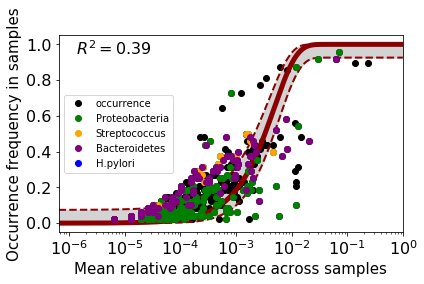

In [24]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True

#Options: S1: normal/cancer; S2:e (esophgous) / hn (head and neck)

#Run with no output files
#neufit('normal', 'TCGA_WGS', 'e', norm_graph, colored_graph, non_neutral, non_save = True)

#Run with all possible output files
neufit('normal', 'TCGA_WGS', 'e', norm_graph, colored_graph, non_neutral, full_non_neutral = True)


#### Esophagus Cancer

Running dataset: TCGA_WGSCategory:esophagus_cancer

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 2105
    # variables        = 1
    chi-square         = 10.8841622
    reduced chi-square = 0.00517308
    Akaike info crit   = -11080.3241
    Bayesian info crit = -11074.6720
[[Variables]]
    N:  3530 (fixed)
    m:  0.01188954 +/- 4.4364e-04 (3.73%) (init = 0.5)

 R^2 = 0.55

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
3,0.637588,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Bradyrhizobiaceae,g__Bradyrhizobium,s__Bradyrhizobium elkanii
4,0.571380,k__Bacteria,p__Spirochaetes,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Treponema,s__Treponema denticola
0,0.571272,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Sanguibacteroides,s__Sanguibacteroides justesenii
2,0.520151,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas taxi
1,0.503718,k__Bacteria,p__Firmicutes,c__Erysipelotrichia,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Faecalitalea,s__Faecalitalea cylindroides


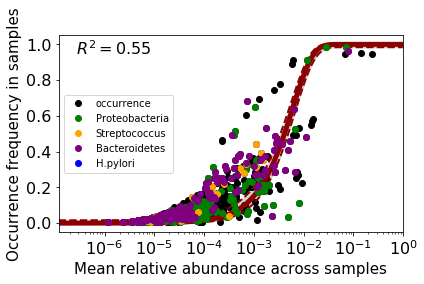

In [25]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True
#Options: S1: normal/cancer; S2:e (esophgous) / hn (head and neck)

#Run with all possible output files
neufit('cancer', 'TCGA_WGS', 'e', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

#### Head and Neck Normal (Paired Tissue Normal)

Running dataset: TCGA_WGSCategory:headNeck_normal

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 1171
    # variables        = 1
    chi-square         = 12.5119915
    reduced chi-square = 0.01069401
    Akaike info crit   = -5313.08218
    Bayesian info crit = -5308.01656
[[Variables]]
    N:  3195 (fixed)
    m:  0.01776435 +/- 9.4386e-04 (5.31%) (init = 0.5)

 R^2 = 0.38

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
5,0.764627,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Bradyrhizobiaceae,g__Bradyrhizobium,s__Bradyrhizobium elkanii
4,0.718959,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
1,0.717978,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas taxi
2,0.669120,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
3,0.634243,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
6,0.614093,k__Bacteria,p__Actinobacteria,c__Actinobacteria,o__Propionibacteriales,f__Propionibacteriaceae,g__Cutibacterium,s__Cutibacterium acnes
0,0.601892,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Alcaligenaceae,g__Orrella,s__Orrella dioscoreae
7,0.533129,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Prevotellaceae,g__Prevotella,s__Prevotella oris


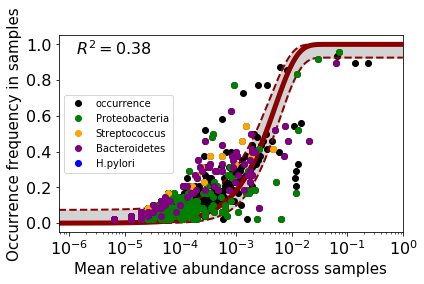

In [26]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True
#Options: S1: normal/cancer; S2:e (esophgous) / hn (head and neck)

#Run with all possible output files
neufit('normal', 'TCGA_WGS', 'hn', norm_graph, colored_graph, non_neutral, full_non_neutral = True)

#### Head and Neck Cancer

Running dataset: TCGA_WGSCategory:headNeck_cancer

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 2147
    # variables        = 1
    chi-square         = 10.9261897
    reduced chi-square = 0.00509142
    Akaike info crit   = -11335.5860
    Bayesian info crit = -11329.9141
[[Variables]]
    N:  3530 (fixed)
    m:  0.01222510 +/- 4.5143e-04 (3.69%) (init = 0.5)

 R^2 = 0.55

Top NonNeutral Microbes


,Difference off Neutral Model,Kingdom,Phylum,Class,Order,Family,Genus,Species
4,0.664301,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,f__Bradyrhizobiaceae,g__Bradyrhizobium,s__Bradyrhizobium elkanii
5,0.559510,k__Bacteria,p__Spirochaetes,c__Spirochaetia,o__Spirochaetales,f__Spirochaetaceae,g__Treponema,s__Treponema denticola
2,0.532011,k__Bacteria,p__Firmicutes,c__Erysipelotrichia,o__Erysipelotrichales,f__Erysipelotrichaceae,g__Faecalitalea,s__Faecalitalea cylindroides
0,0.531654,k__Bacteria,p__Bacteroidetes,c__Bacteroidia,o__Bacteroidales,f__Porphyromonadaceae,g__Sanguibacteroides,s__Sanguibacteroides justesenii
3,0.525487,k__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Sphingomonadales,f__Sphingomonadaceae,g__Sphingomonas,s__Sphingomonas taxi
1,0.506416,k__Bacteria,p__Proteobacteria,c__Betaproteobacteria,o__Burkholderiales,f__Alcaligenaceae,g__Orrella,s__Orrella dioscoreae


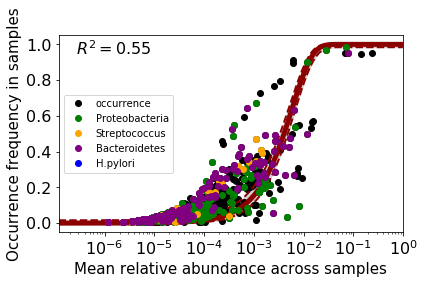

In [23]:
'''Choose True or False for the following parameters:
               norm_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               colored_graph : True/False : Prints and saves the neutral evolution graph without any coloring
               non_neutral : True/False : Prints and saves the most non-neutral microbes in csv file
'''
norm_graph = True
colored_graph = True
non_neutral = True
#Options: S1: normal/cancer; S2:e (esophgous) / hn (head and neck)

neufit('cancer', 'TCGA_WGS', 'hn', norm_graph, colored_graph, non_neutral, full_non_neutral = True)